# VR track jet training impact

**Goal:** Make a version of this plot that summarizes the improvements from the boosted analysis due to the better VR track jet b-taggers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
os.sys.path.append( "PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

PyATLASstyle/PyATLASstyle.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
lumi1 = 36.1
lumi2 = 139

BR_Hbb = 0.582

In [3]:
fDir1 = 'HEPData-ins1668124-v1-csv'
fDir2 = 'HEPData-ins2032611-v2-csv'

**Step 1:** Let's look at the scalar limits

In [41]:
'''
36ifb result
'''

# Load in the obs limit
df1 = pd.read_csv(f'{fDir1}/Table1.csv',skiprows=9,nrows=23,index_col=0)

df_tmp = pd.read_csv(f'{fDir1}/Table1.csv',skiprows=35,nrows=23,index_col=0)

# Load in the exp limit
assert np.sum(df1.index != df_tmp.index) == 0

df1['Expected limit [fb]'] = df_tmp['Expected limit [fb]']
df1

,Observed limit [fb],Expected limit [fb]
Mass of scalar [GEV],,
260.0,2409.109865,2303.158931
270.0,4063.758806,2099.904788
280.0,5078.138202,1752.865606
290.0,2731.078711,1319.425707
300.0,1065.577335,1229.200874
400.0,222.130395,210.511543
500.0,47.060802,73.814624
600.0,27.256198,39.124946
700.0,14.112149,23.188832


In [42]:
df_tmp.columns

Index(['Expected limit [fb]', '1 sigma +', '1 sigma -', '2 sigma +',
       '2 sigma -'],
      dtype='object')

In [43]:
f'{fDir2}/Table19.csv'

'HEPData-ins2032611-v2-csv/Table19.csv'

In [58]:
df2 = pd.read_csv(f'{fDir2}/Table19.csv',skiprows=8,nrows=28,index_col=0)

df_tmp = pd.read_csv(f'{fDir2}/Table19.csv',skiprows=37,nrows=28,index_col=0)

exp_col = df_tmp.columns[0]
df2[exp_col] = df_tmp[exp_col]

df2

,Combined observed cross-section upper limit at 95% CL of $pp \rightarrow X \rightarrow HH$ [fb],Combined expected cross-section upper limit at 95% CL of $pp \rightarrow X \rightarrow HH$ [fb]
m(X) [GeV],,
251,3740.014623,2979.651091
260,8413.666185,6039.199322
280,7741.787588,4262.523821
300,3479.437441,2542.027535
350,389.695991,651.856073
400,162.675059,266.620784
500,85.197406,94.169340
600,25.975147,45.357341
700,22.124646,24.554599


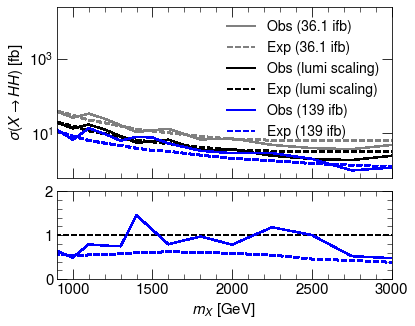

In [9]:
# ms = np.array(list(set(df1.index).intersection(set(df2.index))))
# ms = np.sort(ms)

# fig, (ax, ax_rat) = plt.subplots(2,1,figsize=(6,6), sharex=True,
#                                  gridspec_kw={"height_ratios": [.66,.34],
#                                               "hspace":0.1, "bottom":0.25})



# ax.plot(df1.index,df1['Observed limit [fb]']/(BR_Hbb)**2,'grey',ls='-',
#           label='Obs (36.1 ifb)')
# ax.plot(df1.index,df1['Expected limit [fb]']/(BR_Hbb)**2,'grey',ls='--',
#           label='Exp (36.1 ifb)')

# s = np.sqrt(lumi1/lumi2)/(BR_Hbb)**2
# ax.plot(df1.index,s*df1['Observed limit [fb]'],'k-',
#           label='Obs (lumi scaling)')
# ax.plot(df1.index,s*df1['Expected limit [fb]'],'k--',
#           label='Exp (lumi scaling)')

# ax.plot(df2.index,df2[df2.columns[0]],
#            'b-',label='Obs (139 ifb)')
# ax.plot(df2.index,df2[exp_col],'b--',
#           label='Exp (139 ifb)')


# # Show the rel improvment in addition to lumi scaling
# ax_rat.plot(ms,df2.loc[ms,df2.columns[0]]/(s*df1.loc[ms,'Observed limit [fb]']),'b-')
# ax_rat.plot(ms,df2.loc[ms,exp_col]/(s*df1.loc[ms,'Expected limit [fb]']),'b--')


# # ax = plt.gca()
# ax.set_yscale('log')

# ax_rat.set_xlim(900,3000)
# ax_rat.set_ylim(0,2)

# ax_rat.set_xlabel('$m_X$ [GeV]')
# ax.set_ylabel(r'$\sigma (X \rightarrow HH)$ [fb]')
# ax.legend()

# plt.show()

In [10]:
ms

array([ 260.,  280.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200., 1300., 1400., 1600., 1800., 2000., 2250.,
       2500., 2750., 3000.])

The improvements from the observed data are not as clear, so I'll just show the expected lines in these plots.

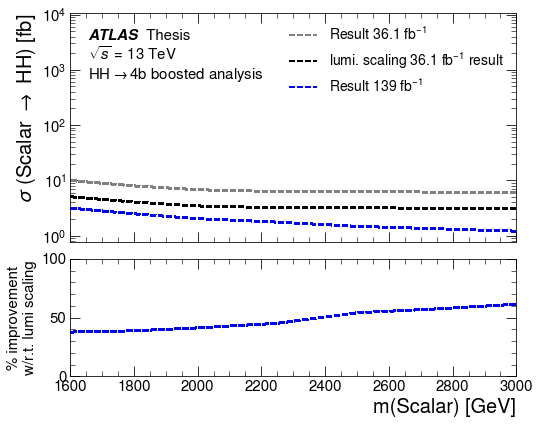

In [11]:
fig, (ax, ax_rat) = plt.subplots(2,1,figsize=(8,8), sharex=True,
                                 gridspec_kw={"height_ratios": [.66,.34],
                                              "hspace":0.1, "bottom":0.25})
ax.plot(df1.index,df1['Expected limit [fb]']/(BR_Hbb)**2,'grey',ls='--',
          label='Result 36.1 fb$^{-1}$')

s = np.sqrt(lumi1/lumi2)/(BR_Hbb)**2
ax.plot(df1.index,s*df1['Expected limit [fb]'],'k--', label='lumi. scaling 36.1 fb$^{-1}$ result')
ax.plot(df2.index, df2[exp_col],'b--', label='Result 139 fb$^{-1}$')

# Show the rel improvment in addition to lumi scaling
y1 = s*df1.loc[ms,'Expected limit [fb]'].values
y2 = df2.loc[ms,exp_col].values 

#ax_rat.plot(ms,np.ones_like(ms),'k--')
ax_rat.plot(ms,100*(1 - y2/y1),'b--')

# ax = plt.gca()
ax.set_yscale('log')

ax_rat.set_xlim(1600,3000)
ax_rat.set_ylim(0,100)

ax_rat.set_xlabel('m(Scalar) [GeV]',loc='right',fontsize=20)
ax.set_ylabel(r'$\sigma$ (Scalar $\rightarrow$ HH) [fb]',loc='top',fontsize=20)
ax_rat.set_ylabel('% improvement\nw/r.t. lumi scaling')
ax.legend()

pas.makeATLAStag(ax, fig, first_tag=' Thesis',
                 second_tag=r"$\sqrt{s}$ = 13 TeV"+"\n"
                            +r"HH$\rightarrow$4b boosted analysis",
                 line_spacing=0.9) 

#plt.savefig('../figures/my_dihiggs/HH4b-boosted-vr-trk-jet-improvements.pdf',bbox_inches='tight')

plt.show()

OK - I wanted to extend the x-axis down as far as the boosted analysis went - so I asked Jana for the numbers - and she sent them to me!!

In [12]:
jdf = pd.DataFrame([190.845, 50.6693, 19.0318, 11.181, 7.93022,
                    5.60096, 4.293, 3.37077, 2.69178, 2.2925,
                    2.12683, 2.13088, 2.07599, 2.07325],
                   index=[800,900,1000,1100,1200,1300,1400,
                          1600,1800,2000,2250,2500,2750,3000],
                   columns=['Expected limit [fb]'])

In [26]:
# Get the boosted only numbers from the table too
bdf = pd.read_csv(f'{fDir2}/Table19.csv',skiprows=108,nrows=7,index_col=0)
bdf

,-
800,
900,81.367394
1000,37.765890
1100,21.397140
1200,11.865271
1300,6.793308
1400,4.857606
1500,3.813473


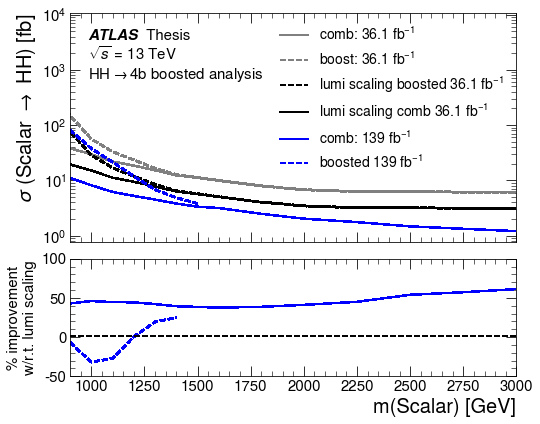

In [97]:
fig, (ax, ax_rat) = plt.subplots(2,1,figsize=(8,8), sharex=True,
                                 gridspec_kw={"height_ratios": [.66,.34],
                                              "hspace":0.1, "bottom":0.25})

ax.plot(df1.index,df1['Expected limit [fb]']/(BR_Hbb)**2,'grey',ls='-',
          label='comb: 36.1 fb$^{-1}$')

ax.plot(jdf.index,jdf['Expected limit [fb]']/(BR_Hbb)**2,'grey',ls='--',
          label='boost: 36.1 fb$^{-1}$')

s = np.sqrt(lumi1/lumi2)/(BR_Hbb)**2
ax.plot(jdf.index,s*jdf['Expected limit [fb]'],'k--', label='lumi scaling boosted 36.1 fb$^{-1}$')

ax.plot(df1.index,s*df1['Expected limit [fb]'],'k-', label='lumi scaling comb 36.1 fb$^{-1}$')

ax.plot(df2.index, df2[exp_col],'b-', label='comb: 139 fb$^{-1}$')

ax.plot(bdf.index, bdf.values,'b--', label='boosted 139 fb$^{-1}$')

# Show the rel improvment in addition to lumi scaling

# boosted comparison
y1 = s*jdf.loc[bdf.index[:-1]].values.squeeze() 
y2 = bdf.values[:-1].squeeze()

ax_rat.plot(bdf.index.values[:-1],100*(1 - y2/y1),'b--')


# comb comparison
ms = np.array(list(set(jdf.index).intersection(set(df2.index))))
ms = np.sort(ms)

y1 = s*df1.loc[ms,'Expected limit [fb]'].values
y2 = df2.loc[ms,exp_col].values

ax_rat.plot(ms,100*(1 - y2/y1),'b-')

ax_rat.plot([900,3000],[1]*2,'k--')

ax.set_yscale('log')

ax_rat.set_xlim(900,3000)
ax_rat.set_ylim(-50,100)

ax_rat.set_xlabel('m(Scalar) [GeV]',loc='right',fontsize=20)
ax.set_ylabel(r'$\sigma$ (Scalar $\rightarrow$ HH) [fb]',loc='top',fontsize=20)
ax_rat.set_ylabel('% improvement\nw/r.t. lumi scaling')
ax.legend()

pas.makeATLAStag(ax, fig, first_tag=' Thesis',
                 second_tag=r"$\sqrt{s}$ = 13 TeV"+"\n"
                            +r"HH$\rightarrow$4b boosted analysis",
                 line_spacing=0.9) 

plt.savefig('../figures/my_dihiggs/HH4b-boosted-vr-trk-jet-incl-comb.pdf',bbox_inches='tight')

plt.show()

OK - the improvements for VR track jets only start at 1250 GeV.

But, doing better for the resolved analysis with hihg pT PFlow jets at higher energies is _also_ my work from the retraining campaign.

Now over write these entries in `df2`.

In [98]:
df2.loc[bdf.index,exp_col] = bdf.values

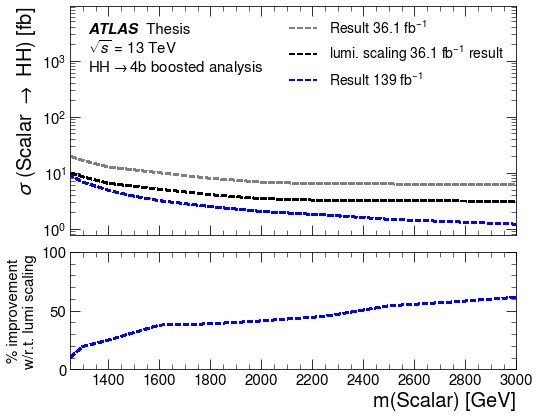

In [102]:
fig, (ax, ax_rat) = plt.subplots(2,1,figsize=(8,8), sharex=True,
                                 gridspec_kw={"height_ratios": [.66,.34],
                                              "hspace":0.1, "bottom":0.25})

ax.plot(jdf.index,jdf['Expected limit [fb]']/(BR_Hbb)**2,'grey',ls='--',
          label='Result 36.1 fb$^{-1}$')

s = np.sqrt(lumi1/lumi2)/(BR_Hbb)**2
ax.plot(jdf.index,s*jdf['Expected limit [fb]'],'k--', label='lumi. scaling 36.1 fb$^{-1}$ result')
ax.plot(df2.index, df2[exp_col],'b--', label='Result 139 fb$^{-1}$')

# Show the rel improvment in addition to lumi scaling
y1 = s*jdf.loc[ms,'Expected limit [fb]'].values
y2 = df2.loc[ms,exp_col].values 

ax_rat.plot(ms,100*(1 - y2/y1),'b--')

# ax = plt.gca()
ax.set_yscale('log')

ax_rat.set_xlim(1250,3000)
ax_rat.set_ylim(0,100)

ax_rat.set_xlabel('m(Scalar) [GeV]',loc='right',fontsize=20)
ax.set_ylabel(r'$\sigma$ (Scalar $\rightarrow$ HH) [fb]',loc='top',fontsize=20)
ax_rat.set_ylabel('% improvement\nw/r.t. lumi scaling')
ax.legend()

pas.makeATLAStag(ax, fig, first_tag=' Thesis',
                 second_tag=r"$\sqrt{s}$ = 13 TeV"+"\n"
                            +r"HH$\rightarrow$4b boosted analysis",
                 line_spacing=0.9) 

plt.savefig('../figures/my_dihiggs/HH4b-boosted-vr-trk-jet-improvements.pdf',bbox_inches='tight')

plt.show()